         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

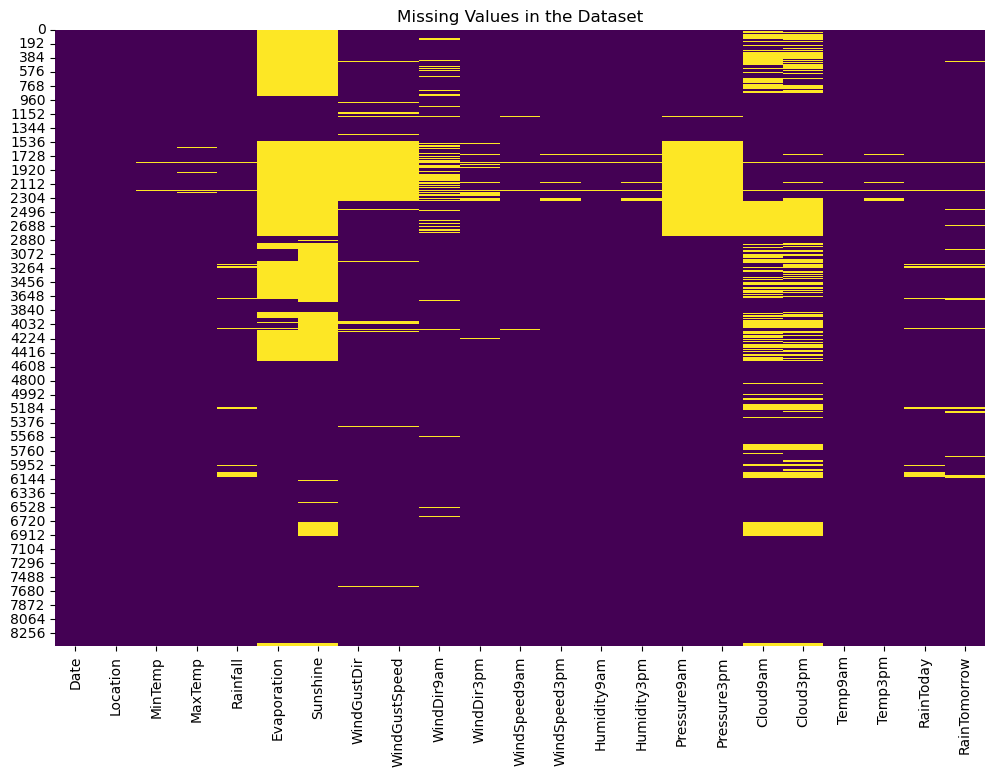

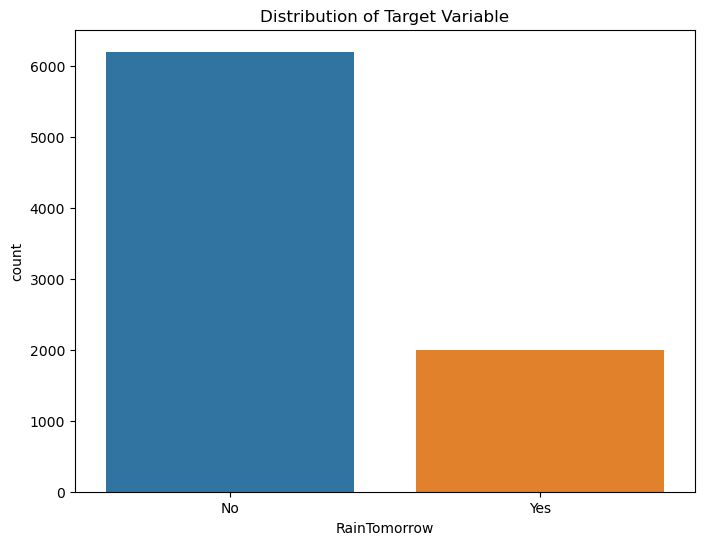

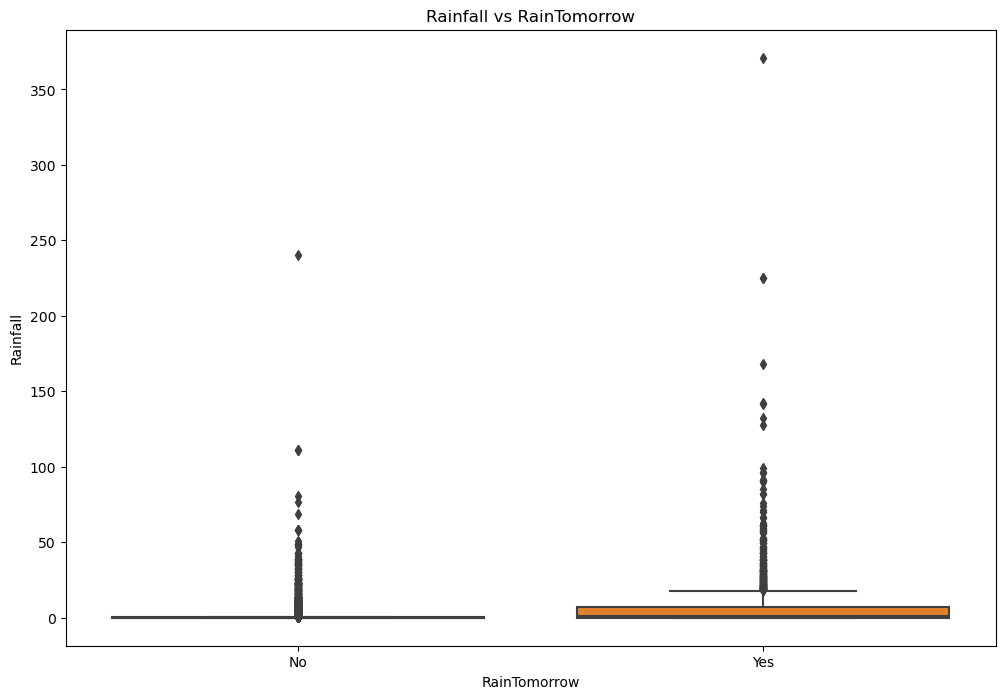

0    0
dtype: int64

Logistic Regression:
Accuracy: 0.8406593406593407
Precision: 0.7345454545454545
Recall: 0.517948717948718
F1 Score: 0.6075187969924812
ROC AUC: 0.729727564102564
Confusion Matrix:
[[1175   73]
 [ 188  202]]
Cross-Validation Scores: [0.8221374  0.83206107 0.84122137 0.83957219 0.84033613]
Mean CV Score: 0.8350656348590789

Support Vector Classifier:
Accuracy: 0.8547008547008547
Precision: 0.8114754098360656
Recall: 0.5076923076923077
F1 Score: 0.6246056782334385
ROC AUC: 0.7354166666666667
Confusion Matrix:
[[1202   46]
 [ 192  198]]
Cross-Validation Scores: [0.85877863 0.8519084  0.85725191 0.84033613 0.85561497]
Mean CV Score: 0.8527780078027047

Random Forest Classifier:
Accuracy: 0.8998778998778999
Precision: 0.886986301369863
Recall: 0.6641025641025641
F1 Score: 0.7595307917888563
ROC AUC: 0.8188301282051281
Confusion Matrix:
[[1215   33]
 [ 131  259]]
Cross-Validation Scores: [0.88473282 0.87862595 0.88091603 0.86401833 0.87471352]
Mean CV Score: 0.87660133310

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib

file_path = 'D://Rainfall.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())
print(data.describe())

missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='RainTomorrow', data=data)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='RainTomorrow', y='Rainfall', data=data)
plt.title('Rainfall vs RainTomorrow')
plt.show()

numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

data = data.dropna(subset=['RainTomorrow'])

X = data.drop(['Date', 'RainTomorrow'], axis=1)
y = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

X = preprocessor.fit_transform(X)

print(pd.DataFrame(X).isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC: {roc_auc}')
    print(f'Confusion Matrix:\n{cm}')
    print(f'Cross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score: {cv_scores.mean()}')
    
    return {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_scores': cv_scores,
        'mean_cv_score': cv_scores.mean()
    }

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f'\n{name}:')
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

best_model_name = max(results, key=lambda name: results[name]['mean_cv_score'])
best_model = results[best_model_name]['model']

print(f'\nBest Model: {best_model_name}')

if best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
elif best_model_name == 'Support Vector Classifier':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'poly', 'sigmoid']
    }
elif best_model_name == 'Random Forest Classifier':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [4, 6, 8, 10]
    }
elif best_model_name == 'Gradient Boosting Classifier':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'\nBest Parameters for {best_model_name}: {grid_search.best_params_}')

final_model = grid_search.best_estimator_
final_results = evaluate_model(final_model, X_train, X_test, y_train, y_test)

joblib.dump(final_model, 'best_model.pkl')

print(f'\nFinal Model: {final_model}')
print(f'Final Model Performance:\n{final_results}')
